In [280]:
!pip install mvlearn

In [281]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import special
import math
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.manifold import TSNE 
from sklearn import manifold
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

from sklearn.metrics.pairwise import cosine_similarity, paired_distances
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/100leaves/data_Tex_64.csv
/kaggle/input/100leaves/data_Sha_64.csv
/kaggle/input/100leaves/data_Mar_64.csv
/kaggle/input/100leaves-txt/data_Mar_64.txt
/kaggle/input/100leaves-txt/data_Tex_64.txt
/kaggle/input/100leaves-txt/data_Sha_64.txt


In [282]:
view_Tex=pd.read_table("../input/100leaves-txt/data_Tex_64.txt",header=None,sep=",")
view_Tex
view_Sha=pd.read_csv("../input/100leaves-txt/data_Sha_64.txt",header=None,sep=",")
view_Sha
view_Mar=pd.read_csv("../input/100leaves-txt/data_Mar_64.txt",header=None,sep=",")
view_Mar
k_max=18
s_Tex=view_Tex.iloc[15:303,:]

lable_in_tex=s_Tex.iloc[:,0].unique()
#for i in  lable_in_tex:
  #  print(i)

s_Mar=view_Mar[view_Mar.iloc[:,0].isin(lable_in_tex)]
s_Tex

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
15,Acer Capillipes,0.000977,0.030273,0.009766,0.000000,0.103520,0.004883,0.000000,0.080078,0.039062,...,0.094727,0.0,0.016602,0.000000,0.018555,0.000000,0.0,0.000977,0.028320,0.000000
16,Acer Capillipes,0.004883,0.061523,0.021484,0.000977,0.045898,0.005859,0.006836,0.070312,0.064453,...,0.032227,0.0,0.002930,0.000000,0.018555,0.000000,0.0,0.000000,0.036133,0.020508
17,Acer Capillipes,0.000000,0.048828,0.020508,0.000000,0.083008,0.004883,0.000977,0.080078,0.050781,...,0.022461,0.0,0.002930,0.000000,0.018555,0.000000,0.0,0.000000,0.022461,0.000000
18,Acer Capillipes,0.000000,0.060547,0.031250,0.000000,0.104490,0.015625,0.000000,0.097656,0.035156,...,0.106450,0.0,0.011719,0.000000,0.006836,0.000000,0.0,0.000000,0.016602,0.000977
19,Acer Capillipes,0.000000,0.058594,0.017578,0.000000,0.099609,0.015625,0.000000,0.097656,0.031250,...,0.096680,0.0,0.008789,0.000000,0.011719,0.000000,0.0,0.000000,0.021484,0.000977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Betula Pendula,0.006836,0.000977,0.000000,0.120120,0.000000,0.007812,0.001953,0.000000,0.022461,...,0.000000,0.0,0.000000,0.006836,0.023438,0.000000,0.0,0.000000,0.000000,0.022461
299,Betula Pendula,0.000000,0.000000,0.000000,0.032227,0.000000,0.000977,0.000000,0.000000,0.006836,...,0.000000,0.0,0.000000,0.030273,0.002930,0.018555,0.0,0.048828,0.000000,0.000000
300,Betula Pendula,0.000000,0.000977,0.000000,0.079102,0.000000,0.004883,0.000000,0.000000,0.012695,...,0.000000,0.0,0.000000,0.050781,0.005859,0.000977,0.0,0.025391,0.009766,0.000000
301,Betula Pendula,0.000000,0.000000,0.000000,0.036133,0.000000,0.006836,0.000977,0.000000,0.005859,...,0.000000,0.0,0.000000,0.047852,0.017578,0.006836,0.0,0.050781,0.020508,0.003906


In [283]:
s_Sha=pd.DataFrame()
for i in lable_in_tex:
    
    s_Sha1=view_Sha[view_Sha.iloc[:,0].isin([i])]
    s_Sha=pd.concat([s_Sha,s_Sha1],axis=0,ignore_index=True)
s_Sha.describe()

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.000606,0.000589,0.000569,0.000552,0.000538,0.000530,0.000527,0.000521,0.000513,0.000503,...,0.000472,0.000469,0.000463,0.000463,0.000473,0.000487,0.000505,0.000533,0.000566,0.000597
std,0.000244,0.000247,0.000243,0.000241,0.000239,0.000231,0.000222,0.000216,0.000215,0.000217,...,0.000189,0.000191,0.000189,0.000194,0.000205,0.000217,0.000224,0.000224,0.000225,0.000234
min,0.000226,0.000196,0.000186,0.000149,0.000183,0.000147,0.000111,0.000110,0.000136,0.000113,...,0.000150,0.000147,0.000125,0.000079,0.000091,0.000112,0.000139,0.000159,0.000216,0.000210
25%,0.000448,0.000435,0.000411,0.000396,0.000382,0.000373,0.000387,0.000385,0.000365,0.000349,...,0.000330,0.000339,0.000346,0.000331,0.000321,0.000317,0.000342,0.000375,0.000414,0.000442
50%,0.000544,0.000524,0.000504,0.000485,0.000480,0.000480,0.000471,0.000475,0.000465,0.000442,...,0.000435,0.000449,0.000454,0.000451,0.000443,0.000454,0.000456,0.000476,0.000506,0.000534
75%,0.000674,0.000660,0.000644,0.000634,0.000624,0.000604,0.000580,0.000590,0.000602,0.000601,...,0.000563,0.000558,0.000547,0.000554,0.000578,0.000607,0.000632,0.000632,0.000651,0.000669
max,0.001460,0.001436,0.001360,0.001315,0.001298,0.001287,0.001314,0.001290,0.001277,0.001378,...,0.001345,0.001333,0.001200,0.001139,0.001180,0.001181,0.001178,0.001284,0.001383,0.001472


In [284]:
s_Tex.shape
y_Tex=s_Tex.iloc[:,0]
y_Tex=y_Tex.values
x_Tex=s_Tex.iloc[:,1:66].values
for i in range (0,len(y_Tex)):

    if y_Tex[i]== 'Acer Capillipes':
        y_Tex[i]=1
    elif y_Tex[i]== 'Acer Circinatum':
        y_Tex[i]=2
    elif y_Tex[i]== 'Acer Mono':
        y_Tex[i]=3
    elif y_Tex[i]== 'Acer Opalus':
        y_Tex[i]=4
    elif y_Tex[i]== 'Acer Palmatum':
        y_Tex[i]=5
    elif y_Tex[i]== 'Acer Pictum':
        y_Tex[i]=6
    elif y_Tex[i]=='Acer Platanoids':
        y_Tex[i]=7
    elif y_Tex[i]== 'Acer Rubrum':
        y_Tex[i]=8
    elif y_Tex[i]== 'Acer Rufinerve':
        y_Tex[i]=9 
    elif y_Tex[i]== 'Acer Saccharinum':
        y_Tex[i]=10  
    elif y_Tex[i]== 'Alnus Cordata':
        y_Tex[i]=11  
    elif y_Tex[i]==  'Alnus Maximowiczii':
        y_Tex[i]=12 
    elif y_Tex[i]==  'Alnus Rubra':
        y_Tex[i]=13
    elif y_Tex[i]==  'Alnus Sieboldiana':
        y_Tex[i]=14
    
    elif y_Tex[i]== 'Alnus Viridis':
        y_Tex[i]=15
    elif y_Tex[i]=='Arundinaria Simonii':
        y_Tex[i]=16
    elif y_Tex[i]=='Betula Austrosinensis':
        y_Tex[i]=17
    else:
        y_Tex[i]=18
print(y_Tex)
print(x_Tex)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18]
[[0.000977 0.030273 0.009766 ... 0.000977 0.02832  0.      ]
 [0.004883 0.061523 0.021484 ... 0.       0.036133 0.020508]
 [0.       0.048828 0.020508 ... 0.       0.022461 0.      ]
 ...
 [0.       0.000977 0.       ... 0.025391 0.009766 0.      ]
 [0.       0.       

In [285]:
y_Sha=s_Sha.iloc[:,0]
y_Sha=y_Sha.values
x_Sha=s_Sha.iloc[:,1:66].values

for i in range (0,len(y_Sha)):

    if y_Sha[i]== 'Acer Capillipes':
        y_Sha[i]=1
    elif y_Sha[i]== 'Acer Circinatum':
        y_Sha[i]=2
    elif y_Sha[i]== 'Acer Mono':
        y_Sha[i]=3
    elif y_Sha[i]== 'Acer Opalus':
        y_Sha[i]=4
    elif y_Sha[i]== 'Acer Palmatum':
        y_Sha[i]=5
    elif y_Sha[i]== 'Acer Pictum':
        y_Sha[i]=6
    elif y_Sha[i]=='Acer Platanoids':
        y_Sha[i]=7
    elif y_Sha[i]== 'Acer Rubrum':
        y_Sha[i]=8
    elif y_Sha[i]== 'Acer Rufinerve':
        y_Sha[i]=9 
    elif y_Sha[i]== 'Acer Saccharinum':
        y_Sha[i]=10  
    elif y_Sha[i]== 'Alnus Cordata':
        y_Sha[i]=11  
    elif y_Sha[i]==  'Alnus Maximowiczii':
        y_Sha[i]=12 
    elif y_Sha[i]==  'Alnus Rubra':
        y_Sha[i]=13
    elif y_Sha[i]==  'Alnus Sieboldiana':
        y_Sha[i]=14
    
    elif y_Sha[i]== 'Alnus Viridis':
        y_Sha[i]=15
    elif y_Sha[i]=='Arundinaria Simonii':
        y_Sha[i]=16
    elif y_Sha[i]=='Betula Austrosinensis':
        y_Sha[i]=17
    else:
        y_Sha[i]=18

In [286]:
y_Mar=s_Mar.iloc[:,0]
y_Mar=y_Mar.values
x_Mar=s_Mar.iloc[:,1:66].values
for i in range (0,len(y_Mar)):

    if y_Mar[i]== 'Acer Capillipes':
        y_Mar[i]=1
    elif y_Mar[i]== 'Acer Circinatum':
        y_Mar[i]=2
    elif y_Mar[i]== 'Acer Mono':
        y_Mar[i]=3
    elif y_Mar[i]== 'Acer Opalus':
        y_Mar[i]=4
    elif y_Mar[i]== 'Acer Palmatum':
        y_Mar[i]=5
    elif y_Mar[i]== 'Acer Pictum':
        y_Mar[i]=6
    elif y_Mar[i]=='Acer Platanoids':
        y_Mar[i]=7
    elif y_Mar[i]== 'Acer Rubrum':
        y_Mar[i]=8
    elif y_Mar[i]== 'Acer Rufinerve':
        y_Mar[i]=9 
    elif y_Mar[i]== 'Acer Saccharinum':
        y_Mar[i]=10  
    elif y_Mar[i]== 'Alnus Cordata':
        y_Mar[i]=11  
    elif y_Mar[i]==  'Alnus Maximowiczii':
        y_Mar[i]=12 
    elif y_Mar[i]==  'Alnus Rubra':
        y_Mar[i]=13
    elif y_Mar[i]==  'Alnus Sieboldiana':
        y_Mar[i]=14
    
    elif y_Mar[i]== 'Alnus Viridis':
        y_Mar[i]=15
    elif y_Mar[i]=='Arundinaria Simonii':
        y_Mar[i]=16
    elif y_Mar[i]=='Betula Austrosinensis':
        y_Mar[i]=17
    else:
        y_Mar[i]=18
y_Mar


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 17, 17, 17, 17, 17, 17

In [287]:

x_Tex= np.column_stack((x_Tex,range(0,288)))
x_Mar= np.column_stack((x_Mar,range(0,288)))
x_Sha= np.column_stack((x_Sha,range(0,288)))

In [288]:
print(x_Tex.shape)
print(x_Sha.shape)
print(x_Mar.shape)

(288, 65)
(288, 65)
(288, 65)


In [289]:
print(y_Tex.shape)
print(y_Mar.shape)
print(y_Sha.shape)
print(y_Mar[31])
print(y_Tex[31])

(288,)
(288,)
(288,)
2
2


In [290]:
def trans_n1top1(X):
    
    Xmin = np.min(X)
    Xmax = np.max(X)
#将数据映射到[-1,1]区间 即a=-1，b=1
    a = -1
    b = 1
    Y = a + (b-a)/(Xmax-Xmin)*(X-Xmin)
    return Y
for i in range(0,64):
    
    x_Tex[:,i]=trans_n1top1(x_Tex[:,i])
    x_Sha[:,i]=trans_n1top1(x_Sha[:,i])
    x_Mar[:,i]=trans_n1top1(x_Mar[:,i])


In [291]:
seed = 7
test_size = 0.33
print(x_Tex.shape)
X_train_Tex, X_validate_Tex, y_train_Tex, y_validate_Tex = train_test_split(x_Tex, y_Tex, test_size=test_size,
    random_state=seed)

print(X_train_Tex.shape)
print(y_train_Tex)


(288, 65)
(192, 65)
[4 16 4 9 17 12 14 14 15 18 16 6 8 2 1 9 17 1 14 1 2 7 4 17 6 3 7 18 10 9
 1 6 15 3 12 3 5 13 9 4 6 13 12 3 10 7 17 17 8 4 4 13 6 8 17 18 12 17 12 6
 7 13 4 12 1 2 13 8 13 7 11 9 13 5 2 12 11 15 16 17 15 8 11 17 9 2 5 9 10
 9 3 14 12 4 3 15 4 16 4 9 4 2 8 9 7 18 5 17 7 16 1 2 3 12 13 15 8 2 10 12
 6 9 16 8 14 14 5 18 2 16 3 15 1 10 2 15 14 8 18 15 11 7 10 15 18 10 9 4
 17 3 15 1 18 5 6 11 6 10 8 10 13 17 18 13 9 17 3 13 12 16 8 12 10 12 3 1
 16 5 1 5 11 14 3 5 2 12 7 14 5 2 13 11]


In [292]:
x_index_Tex=X_train_Tex[:,64]

x_index_Tex=list(map(int,x_index_Tex))

In [293]:
X_train_Mar=[]
np.array(X_train_Mar )
y_train_Mar=[]
np.array(y_train_Mar )

array([], dtype=float64)

In [294]:
for i in x_index_Tex:
    Mar_arr1x=x_Mar[i].tolist()
    X_train_Mar.append(Mar_arr1x)
    Mar_arr1y=y_Mar[i]
   
    y_train_Mar.append(Mar_arr1y)
X_train_Mar=np.array(X_train_Mar)
y_train_Mar=np.array(y_train_Mar)

In [295]:
X_train_Sha=[]
np.array(X_train_Sha )
y_train_Sha=[]
np.array(y_train_Sha )

array([], dtype=float64)

In [296]:
for i in x_index_Tex:
    Sha_arr1x=x_Sha[i].tolist()
    X_train_Sha.append(Sha_arr1x)
    Sha_arr1y=y_Sha[i]
   
    y_train_Sha.append(Sha_arr1y)
X_train_Sha=np.array(X_train_Sha)
y_train_Sha=np.array(y_train_Sha)

In [297]:
X_train_Sha=X_train_Sha[:,0:64]
y_train_Sha.shape

(192,)

In [298]:
X_train_Tex=X_train_Tex[:,0:64]


In [299]:
X_train_Mar=X_train_Mar[:,0:64]


In [300]:
np.random.seed(888)

Query=np.random.normal(0,1,[64,64])
Key=np.random.normal(0,1,[64,64])
Value=np.random.normal(0,1,[64,64])

In [301]:
Allview = np.vstack((X_train_Tex[0], X_train_Sha[0],X_train_Mar[0]))#拿了第一个view作为样例


In [302]:
#Key representation 
Keyrep=np.dot(Allview,Key)
#Query representation 
Queryrep=np.dot(Allview,Query)
#value representation 
Valuerep=Allview


In [303]:
Newview=[0,0,0]
Mergeview=0#初始化注意力分数加权后相加的value值

for i in range (0,Keyrep.shape[0]):
    dotproduct=np.dot(Keyrep[i,:],Queryrep.T)
    softdot=special.softmax(dotproduct)#Calculate softmax
    
    for g in range(0,len(softdot)):
        scovalue=softdot[g]*Valuerep[g,:]#Multiply scores with values
        
        Mergeview=scovalue+Mergeview
    Newview[i]=Mergeview
    
    Mergeview=0


For tex view

In [304]:
Atweight=[0,0,0]
for sample in range (0,192):
    Allview = np.vstack((X_train_Tex[sample], X_train_Sha[sample],X_train_Mar[sample]))
    Keyrep=np.dot(Allview,Key)
    
    Queryrep=np.dot(Allview,Query)
    Newview=[0,0,0]
    Mergeview=0
    
    dotproduct=np.dot(Keyrep[2,:],Queryrep.T)/math.sqrt(64)
    softdot=special.softmax(dotproduct)#Calculate softmax
    
    for g in range(0,len(softdot)):
        scovalue=softdot[g]*Valuerep[g,:]#Multiply scores with values
        
        Mergeview=scovalue+Mergeview
    Newview[i]=Mergeview
    Mergeview=0
    Atweight=np.vstack((Atweight,softdot))
Atweight=np.delete(Atweight,0,axis=0)


In [305]:

def rand_initial_center1(data_view1,data_view2,data_view3, k_max):
    (m, n) = np.shape(data_view1)
    ki_view1= np.array(np.zeros((k_max, n), dtype=np.float32))
    ki_view2= np.array(np.zeros((k_max, n), dtype=np.float32))
    ki_view3= np.array(np.zeros((k_max, n), dtype=np.float32))
    for i in range(k_max):
        index = int(np.random.rand()*m)
        
        ki_view1[i, :] = data_view1[index, :]
        ki_view2[i, :] = data_view2[index, :]
        ki_view3[i, :] = data_view3[index, :]
    return ki_view1,ki_view2,ki_view3

In [306]:
# ks=0#he number of clusters which share the same locations with other center
# alpha=5
# beta=100

# k_max=18#must be bigger
# size=192# the size of the training set

In [307]:
# (ki_tex,ki_sha,ki_mar)=rand_initial_center1(X_train_Tex,X_train_Sha,X_train_Mar,k_max)

In [308]:
# ki_tex_new=np.zeros((18,64))
# ki_mar_new=np.zeros((18,64))
# ki_sha_new=np.zeros((18,64))

In [309]:
# flag=1
# count=0

In [310]:
# while (flag==1):   #fix center& weight find the best "r"
#     Atweight_before=Atweight
#     D_mat=np.ones((size,k_max))
#     for j in range(0,size):
#         for l in range (0,k_max):

#             Dis_R=(Atweight[j,0]*np.sum(np.square(ki_tex[l]-X_train_Tex[j])))+   (Atweight[j,1]*np.sum(np.square(ki_sha[l]-X_train_Sha[j])))  +   (Atweight[j,1]*np.sum(np.square(ki_mar[l]-X_train_Mar[j])))
#             D_mat[j,l]=-Dis_R/alpha

#     r_mat=np.ones((size,k_max))
#     for j in range(0,size):
#         r_den=0
#         for l in range (0,k_max):
#             r_den=r_den+math.exp(D_mat[j,l])
#             D_mat[j,l]=math.exp(D_mat[j,l])

#         r_mat[j]=D_mat[j]/r_den
#     #fix r& weight find the best "center" in ki_tex
    
#     for j in range(0,k_max):
#         ki_tex[j]=ki_tex[j]*0
#         z_den=0
#         for i in range(0,size):

#             ki_tex[j]=ki_tex[j]+(X_train_Tex[i]*r_mat[i,j]*Atweight[j,0])
#             z_den=z_den+(r_mat[i,j]*Atweight[j,0])
#         ki_tex[j]=ki_tex[j]/z_den
    
    
#     for j in range(0,k_max):
#         ki_sha[j]=ki_sha[j]*0
#         z_den=0
#         for i in range(0,size):

#             ki_sha[j]=ki_sha[j]+(X_train_Sha[i]*r_mat[i,j]*Atweight[j,1])
#             z_den=z_den+(r_mat[i,j]*Atweight[j,1])
#         ki_sha[j]=ki_sha[j]/z_den
    
    
#     for j in range(0,k_max):
#         ki_mar[j]=ki_mar[j]*0
#         z_den=0
#         for i in range(0,size):

#             ki_mar[j]=ki_mar[j]+(X_train_Mar[i]*r_mat[i,j]*Atweight[j,2])
#             z_den=z_den+(r_mat[i,j]*Atweight[j,2])
#         ki_mar[j]=ki_mar[j]/z_den
    
#         #weight define of Attention
#     for j in range(0,size):
#         Dis_W_tex=0
#         Dis_W_sha=0
#         Dis_W_mar=0
#         for l in range (0,k_max):

#             Dis_W_tex=Dis_W_tex+r_mat[j,l]*np.sum(np.square(ki_tex[l]-X_train_Tex[j]))

#             Dis_W_sha=Dis_W_sha+r_mat[j,l]*np.sum(np.square(ki_sha[l]-X_train_Sha[j]))

#             Dis_W_mar=Dis_W_mar+r_mat[j,l]*np.sum(np.square(ki_mar[l]-X_train_Mar[j]))

#         Dis_W_tex=math.exp(-Dis_W_tex/beta)

#         Dis_W_sha=math.exp(-Dis_W_sha/beta)
#         Dis_W_mar=math.exp(-Dis_W_mar/beta)

#         Atweight[j,0]=Dis_W_tex/(Dis_W_tex+Dis_W_sha+Dis_W_mar)
#         Atweight[j,1]=Dis_W_sha/(Dis_W_tex+Dis_W_sha+Dis_W_mar)
#         Atweight[j,2]=Dis_W_mar/(Dis_W_tex+Dis_W_sha+Dis_W_mar)
#     print(ki_tex)
#     if (ki_tex_new.all()==ki_tex.all()):
#         break
#     ki_tex_new=ki_tex
#     ki_sha_new=ki_sha
#     ki_mar_new=ki_mar
#     count=count+1
# X_merge=np.ones((192,64))
# for i in range (0,192):
#     X_merge[i]=(Atweight[i,0]*X_train_Tex[i])+(Atweight[i,1]*X_train_Sha[i])+(Atweight[i,2]*X_train_Mar[i])


In [311]:
# X_ALL_Tex=np.vstack((X_train_Tex,ki_tex))
# yi_tex=np.zeros(k_max)
# yi_tex
# X_ALL_Tex.shape

In [312]:
# y_train_Texnew=np.zeros(192)
# for i in range(0,len(y_train_Tex)):
#     index=np.where(r_mat[i]==np.max(r_mat[i]))
#     index=index[0]
#     y_train_Texnew[i]=index[0]
# y_train_Texnew=y_train_Texnew+1

# y_train_Texnew=y_train_Texnew.astype(int)


In [313]:
# y_train_Texnew=np.append(y_train_Texnew,yi_tex)
# y_train_Texnew
# y_train_Texnew.shape

append clustering center

In [314]:

# tsne = manifold.TSNE(n_components=2, init='pca', random_state=501,learning_rate='auto')




# X_tsne_Tex = tsne.fit_transform(X_merge)
# x_min, x_max = X_tsne_Tex.min(0), X_tsne_Tex.max(0)

# X_norm= (X_tsne_Tex - x_min) / (x_max - x_min)  # 归一化
# plt.figure(figsize=(8, 8))
# for i in range(X_norm.shape[0]):
#     plt.text(X_norm[i, 0], X_norm[i, 1], str(y_train_Texnew[i]), color=plt.cm.Set1(y_train_Texnew[i]), 
#              fontdict={'weight': 'bold', 'size': 9})
# # for i in range(X_normc.shape[0]):
# #     plt.text(X_normc[i, 0], X_normc[i, 1], i, color="red", 
# #              fontdict={'weight': 'bold', 'size': 9})

# plt.xticks([])
# plt.yticks([])
# plt.show()


In [315]:
# Atweight.sum(axis=0)
# total_axis=Atweight.sum(axis=0)
# total=total_axis.sum(axis=0)
# Tex_weight=total_axis[0]/total
# Sha_weight=total_axis[1]/total
# Mar_weight=total_axis[2]/total
# print("Tex_weight=",Tex_weight)
# print("Sha_weight=",Sha_weight)
# print("Mar_weight=",Mar_weight)

In [316]:
# r_mat.sum(axis=0)


In [317]:

def laplace_noisy(sensitivety,epsilon):
   
    n_value=np.random.laplace(0, sensitivety/epsilon, 192)
    return n_value


In [318]:

#隐私预算越小，噪声越大，结果可用性越小，隐私保护越好。


# for r in range(0,192):
#     for c in range(0,64):
#         Xnoise_train_Tex[r,c]=X_train_Tex[r,c]+laplace_noisy(sensitivety,epsilon_tex)
# Xnoise_train_Tex


In [319]:

import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

esp=15


In [320]:
from munkres import Munkres
def best_map(L1,L2):
#L1 should be the labels and L2 should be the clustering number we got
    Label1 = np.unique(L1)       # 去除重复的元素，由小大大排列
    nClass1 = len(Label1)        # 标签的大小
    Label2 = np.unique(L2)       
    nClass2 = len(Label2)
    nClass = np.maximum(nClass1,nClass2)
    G = np.zeros((nClass,nClass))
    for i in range(nClass1):
        ind_cla1 = L1 == Label1[i]
        ind_cla1 = ind_cla1.astype(float)
        for j in range(nClass2):
            ind_cla2 = L2 == Label2[j]
            ind_cla2 = ind_cla2.astype(float)
            G[i,j] = np.sum(ind_cla2 * ind_cla1)
    m = Munkres()
    index = m.compute(-G.T)
    index = np.array(index)
    c = index[:,1]
    newL2 = np.zeros(L2.shape)
    for i in range(nClass2):
        newL2[L2 == Label2[i]] = Label1[c[i]]
    return newL2

In [321]:

from sklearn import metrics
# algorithm = (KMeans(n_clusters = 18 ,init='k-means++', n_init = 10 ,max_iter=300, 
#                         tol=0.0001,  random_state= 111  , algorithm='elkan') )
# ######fit clustering algorithm          baseline
# algorithm.fit(X_train_Tex)
# labels_base = algorithm.labels_

# Newlabels_base_tex=best_map(y_train_Tex,labels_base)
# result_NMI=metrics.normalized_mutual_info_score(Newlabels_base_tex, y_train_Tex)
# print("Tex baseline")
# print("result_NMI:",result_NMI)
################ nosie basic

Xnoise_train_Tex=np.zeros((192,64))
for c in range(0,64):
    Xnoise_train_Tex[:,c]=X_train_Tex[:,c]+laplace_noisy(2,esp)
# algorithm.fit(Xnoise_train_Tex)
# labels_noise = algorithm.labels_

# Newlabels_noise=best_map(y_train_Tex,labels_noise)
# result_NMI=metrics.normalized_mutual_info_score(Newlabels_noise, y_train_Tex)
# print("Tex with noise")
# print("result_NMI:",result_NMI)
# epsilon_tex=10
# Xnoise_train_Tex_CA=np.zeros((192,64))

# ################ nosie CA
# for c in range(0,64):
#     Xnoise_train_Tex_CA[:,c]=X_train_Tex[:,c]+laplace_noisy(6*Tex_weight,10)
# algorithm.fit(Xnoise_train_Tex_CA)
# labels_noise_CA = algorithm.labels_

# Newlabels_noise=best_map(y_train_Tex,labels_noise_CA)
# result_NMI=metrics.normalized_mutual_info_score(Newlabels_noise, y_train_Tex)
# print("Tex CA with noise")
# print("result_NMI:",result_NMI)

In [322]:
# algorithm.fit(X_train_Sha)
# labels = algorithm.labels_

# Newlabels_base_sha=best_map(y_train_Sha,labels)
# result_NMI=metrics.normalized_mutual_info_score(Newlabels_base_sha, y_train_Sha)
# print("Sha baseline")
# print("result_NMI:",result_NMI)

######noise
Xnoise_train_Sha=np.zeros((192,64))
for c in range(0,64):
    Xnoise_train_Sha[:,c]=X_train_Sha[:,c]+laplace_noisy(2,esp)
# algorithm.fit(Xnoise_train_Sha)
# labels_noise = algorithm.labels_

# Newlabels_noise=best_map(y_train_Sha,labels_noise)
# result_NMI=metrics.normalized_mutual_info_score(Newlabels_noise, y_train_Sha)

# print("Sha with noise")
# print("result_NMI:",result_NMI)


# epsilon_Sha=10
# Xnoise_train_Sha_CA=np.zeros((192,64))


# for c in range(0,64):
#     Xnoise_train_Sha_CA[:,c]=X_train_Sha[:,c]+laplace_noisy(6*Sha_weight,10)
# algorithm.fit(Xnoise_train_Sha_CA)
# labels_noise_CA = algorithm.labels_

# Newlabels_noise=best_map(y_train_Sha,labels_noise_CA)
# result_NMI=metrics.normalized_mutual_info_score(labels_noise_CA, y_train_Sha)
# print("Sha CA with noise")
# print("result_NMI:",result_NMI)

In [323]:
# algorithm.fit(X_train_Mar)
# labels = algorithm.labels_

# Newlabels=best_map(y_train_Mar,labels)
# result_NMI=metrics.normalized_mutual_info_score(Newlabels, y_train_Mar)
# print("Mar baseline")
# print("result_NMI:",result_NMI)



######noise
Xnoise_train_Mar=np.zeros((192,64))
for c in range(0,64):
    Xnoise_train_Mar[:,c]=X_train_Mar[:,c]+laplace_noisy(2,esp)
# algorithm.fit(Xnoise_train_Mar)
# labels_noise = algorithm.labels_

# Newlabels_noise=best_map(y_train_Mar,labels_noise)
# result_NMI=metrics.normalized_mutual_info_score(Newlabels_noise, y_train_Mar)
# print("Mar with noise")
# print("result_NMI:",result_NMI)




# epsilon_mar=10
# Xnoise_train_Mar_CA=np.zeros((192,64))


# for c in range(0,64):
#     Xnoise_train_Mar_CA[:,c]=X_train_Mar[:,c]+laplace_noisy(6*Mar_weight,10)
# algorithm.fit(Xnoise_train_Mar_CA)
# labels_noise_CA = algorithm.labels_

# Newlabels_noise_CA=best_map(y_train_Mar,labels_noise_CA )
# result_NMI=metrics.normalized_mutual_info_score(Newlabels_noise_CA, y_train_Mar)
# print("Mar CA with noise")
# print("result_NMI:",result_NMI)

In [324]:
# print(30*Tex_weight)
# print(30*Sha_weight)
# print(30*Mar_weight)
# 30*(1-Tex_weight)
# 30*(1-Sha_weight)
# 30*(1-Mar_weight)

In [325]:
from sklearn.cluster import SpectralClustering
from mvlearn.plotting import quick_visualize
from mvlearn.cluster import MultiviewCoRegSpectralClustering
from mvlearn.datasets import load_UCImultifeature
from sklearn.metrics import normalized_mutual_info_score as nmi_score


In [326]:
RANDOM_SEED = 10

In [327]:
n_class =18
# s_spectral = SpectralClustering(
#     n_clusters=n_class, random_state=RANDOM_SEED, n_init=100)

In [328]:

# s_clusters_tex = s_spectral.fit_predict(X_train_Tex)
# Slabel_tex=best_map(y_train_Tex,s_clusters_tex)
# s_nmi_tex = nmi_score(y_train_Tex,Slabel_tex, average_method='arithmetic')
# print('Single-view View {0:d} NMI Score: {1:.3f}\n'.format(1, s_nmi_tex))

In [329]:

# s_clusters_sha = s_spectral.fit_predict(X_train_Sha)
# Slabel_sha=best_map(y_train_Sha,s_clusters_sha)
# s_nmi_sha = nmi_score(y_train_Sha,Slabel_sha, average_method='arithmetic')
# print('Single-view View 2 NMI Score: {1:.3f}\n'.format(1, s_nmi_sha))

In [330]:

# s_clusters_mar = s_spectral.fit_predict(X_train_Mar)
# Slabel_mar=best_map(y_train_Mar,s_clusters_mar)
# s_nmi_mar= nmi_score(y_train_Mar,Slabel_mar, average_method='arithmetic')
# print('Single-view View 3 NMI Score: {1:.3f}\n'.format(1, s_nmi_mar))

In [331]:
# s_data=np.hstack((X_train_Tex,X_train_Sha,X_train_Mar))
# s_clusters = s_spectral.fit_predict(s_data)
# Slabel_all=best_map(y_train_Mar,s_clusters)
# s_nmi = nmi_score(Slabel_all, s_clusters)

In [332]:
# print('Single-view Concatenated NMI Score: {0:.3f}\n'.format(s_nmi))

In [333]:
m_spectral1 = MultiviewCoRegSpectralClustering(n_clusters=n_class,
                                               random_state=RANDOM_SEED,
                                               n_init=100)

In [334]:
Xs=[X_train_Tex,X_train_Sha,X_train_Mar]


In [335]:
m_clusters1 = m_spectral1.fit_predict(Xs)
m_nmi1 = nmi_score(y_train_Mar, m_clusters1)
print('Multi-view NMI Score: {0:.3f}\n'.format(m_nmi1))

Multi-view NMI Score: 0.975



Duchi

In [336]:
X_train_Mar

array([[ 0.05262874, -0.33334417, -0.12725749, ..., -0.93333788,
        -0.124992  , -0.95238385],
       [-1.        , -0.7460382 , -1.        , ..., -1.        ,
        -0.958336  , -0.95238385],
       [-0.15788623, -0.58730597, -0.12725749, ..., -0.86667577,
        -0.49998933, -0.90476771],
       ...,
       [-1.        , -1.        , -1.        , ...,  0.66665529,
        -1.        , -0.4285575 ],
       [-0.78948503, -0.87302722, -0.81817166, ..., -0.86667577,
        -1.        , -0.90476771],
       [-0.78948503, -0.80952458, -0.12725749, ..., -0.66665529,
        -0.58333867, -0.90476771]])

In [337]:



def number_of_certain_probability(sequence, probability):
    x = random.uniform(0, 1)
    cumulative_probability = 0.0
    for item, item_probability in zip(sequence, probability):
        cumulative_probability += item_probability
        if x < cumulative_probability:
            break
    return item
value_list = [1, -1]
probability = np.zeros(2)#loc 0=1 loc1=1

Duchi_Mar=np.zeros((192,64))
#Duchi wiht Xmargin
for i in range (0,X_train_Mar.shape[0]):
    for g in range(0,X_train_Mar.shape[1]):
        
        probability[0]=(1+X_train_Mar[i,g])/2
        probability[1]=(1-X_train_Mar[i,g])/2
        
        Duchi_Mar[i,g]=number_of_certain_probability(value_list, probability)
        probability = np.zeros(2)
Duchi_Mar
#Tex
Duchi_Tex=np.zeros((192,64))
#Duchi wiht XTexture
for i in range (0,X_train_Tex.shape[0]):
    for g in range(0,X_train_Tex.shape[1]):
        
        probability[0]=(1+X_train_Tex[i,g])/2
        probability[1]=(1-X_train_Tex[i,g])/2
        
        Duchi_Tex[i,g]=number_of_certain_probability(value_list, probability)
        probability = np.zeros(2)
Duchi_Tex
#Sha
Duchi_Sha=np.zeros((192,64))
#Duchi wiht Xshape
for i in range (0,X_train_Sha.shape[0]):
    for g in range(0,X_train_Sha.shape[1]):
        
        probability[0]=(1+X_train_Sha[i,g])/2
        probability[1]=(1-X_train_Sha[i,g])/2
        
        Duchi_Sha[i,g]=number_of_certain_probability(value_list, probability)
        probability = np.zeros(2)
Duchi_Sha

array([[ 1.,  1., -1., ...,  1., -1., -1.],
       [-1., -1., -1., ...,  1., -1., -1.],
       [-1., -1., -1., ..., -1.,  1., -1.],
       ...,
       [-1.,  1., -1., ..., -1., -1.,  1.],
       [-1., -1.,  1., ..., -1., -1., -1.],
       [-1., -1., -1., ...,  1.,  1., -1.]])

In [338]:
# fixed duchi shape
for i in range (0,Duchi_Sha.shape[0]):
    for g in range(0,Duchi_Sha.shape[1]):
        if np.random.binomial(1, math.exp(esp)/(math.exp(esp)+1), 1)==1:
            Duchi_Sha[i,g]=Duchi_Sha[i,g]
        else:
            Duchi_Sha[i,g]=-Duchi_Sha[i,g]
Duchi_Sha=(math.exp(esp)+1)/(math.exp(esp)-1)*Duchi_Sha
# fixed duchi textuere
for i in range (0,Duchi_Tex.shape[0]):
    for g in range(0,Duchi_Tex.shape[1]):
        if np.random.binomial(1, math.exp(esp)/(math.exp(esp)+1), 1)==1:
            Duchi_Tex[i,g]=Duchi_Tex[i,g]
        else:
            Duchi_Tex[i,g]=-Duchi_Tex[i,g]
Duchi_Tex=(math.exp(esp)+1)/(math.exp(esp)-1)*Duchi_Tex
# fixed duchi margin
for i in range (0,Duchi_Mar.shape[0]):
    for g in range(0,Duchi_Mar.shape[1]):
        if np.random.binomial(1, math.exp(esp)/(math.exp(esp)+1), 1)==1:
            Duchi_Mar[i,g]=Duchi_Mar[i,g]
        else:
            Duchi_Mar[i,g]=-Duchi_Mar[i,g]
Duchi_Mar=(math.exp(esp)+1)/(math.exp(esp)-1)*Duchi_Mar

In [339]:
Xs_duchi=[Duchi_Tex,Duchi_Sha,Duchi_Mar]
m_clusters_duchi = m_spectral1.fit_predict(Xs_duchi)
m_nmi1n_duchi = nmi_score(y_train_Mar, m_clusters_duchi)
print('Multi-view NMI Score with noise: {0:.3f}\n'.format(m_nmi1n_duchi))

Multi-view NMI Score with noise: 0.493



# MV CLUSTGERING with noise

In [340]:
# s_clusters_nmar = s_spectral.fit_predict(Xnoise_train_Mar)
# Slabel_nmar=best_map(y_train_Mar,s_clusters_nmar)
# s_nmi_nmar= nmi_score(y_train_Mar,Slabel_nmar, average_method='arithmetic')
# print('Single-view View {0:d} NMI Score: {1:.3f}\n'.format(1, s_nmi_nmar))

In [341]:
Xsn=[Xnoise_train_Tex,Xnoise_train_Sha,Xnoise_train_Mar]
m_clusters1n = m_spectral1.fit_predict(Xsn)
m_nmi1n = nmi_score(y_train_Mar, m_clusters1n)
print('Multi-view NMI Score with noise: {0:.3f}\n'.format(m_nmi1n))

Multi-view NMI Score with noise: 0.952



In [342]:
# Xsn_CA=[Xnoise_train_Tex_CA,Xnoise_train_Sha_CA,Xnoise_train_Mar_CA]
# m_clusters1n_CA = m_spectral1.fit_predict(Xsn_CA)
# m_nmi1n_CA = nmi_score(y_train_Sha, m_clusters1n_CA)
# print('Multi-view NMI Score with CAnoise: {0:.3f}\n'.format(m_nmi1n_CA))
np.random.seed(888) 

In [343]:
X_train_Mar[7]

array([-0.89474252, -0.93651361, -0.63636194, -0.967743  , -0.47369083,
       -0.96330499, -0.72092303, -1.        , -0.86047342, -0.81396456,
       -1.        ,  0.03705389, -0.97183308,  0.08570927, -0.187488  ,
       -1.        , -0.8787954 , -1.        , -0.906256  , -0.916672  ,
        0.3461796 ,  0.26319761, -1.        , -1.        ,  0.76191927,
       -0.63636575, -0.04762834, -0.6499968 , -0.97183241, -0.60000455,
       -0.51723164, -0.44614415, -1.        , -1.        , -0.65219714,
       -1.        , -0.77779042,  0.2820459 , -0.5       ,  0.22220958,
       -0.86915494, -1.        , -0.74544778, -0.16127967, -1.        ,
       -0.03701597,  1.        , -0.71053624, -0.12725749, -0.15789757,
       -1.        , -1.        , -0.54546301, -0.65713366, -0.71428273,
       -0.14287107, -1.        , -0.96226816, -1.        , -0.82609857,
       -0.63638902, -0.53333106, -0.875008  , -0.76189489])

PM

In [344]:

C=(math.exp(esp/2)+1)/(math.exp(esp/2)-1)
k=max(1,min(64,esp/2.5))
#tex PM NOSIE
PM_Tex=np.zeros((192,64))
PM_Tex=X_train_Tex-PM_Tex
for i in range (0,X_train_Tex.shape[0]):
    j=math.ceil(random.uniform(0, 64))
    
    ti_Aj=PM_Tex[i,j-1]
    
    espk=esp/k
    lti=((C+1)/2*ti_Aj)-((C-1)/2)
    rti=lti+C-1
    x=math.ceil(random.uniform(0,1))
    if x<math.exp(esp/2)/(math.exp(esp/2)+1):
        tstar=math.ceil(random.uniform(lti,rti))
        PM_Tex[i,j-1]=64*tstar
    else:
        tstar=lti
        while (tstar>=-C and tstar<lti) or (tstar<=C and tstar>rti):
            tstar=math.ceil(random.uniform(lti,rti))
        PM_Tex[i,j-1]=64*tstar
    
#sha PM noise 
PM_Sha=np.zeros((192,64))
PM_Sha=X_train_Sha-PM_Sha
for i in range (0,X_train_Sha.shape[0]):
    j=math.ceil(random.uniform(0, 64))
    
    ti_Aj=PM_Sha[i,j-1]
    
    espk=esp/k
    lti=((C+1)/2*ti_Aj)-((C-1)/2)
    rti=lti+C-1
    x=math.ceil(random.uniform(0,1))
    if x<math.exp(esp/2)/(math.exp(esp/2)+1):
        tstar=math.ceil(random.uniform(lti,rti))
        PM_Sha[i,j-1]=64*tstar
    else:
        tstar=lti
        while (tstar>=-C and tstar<lti) or (tstar<=C and tstar>rti):
            tstar=math.ceil(random.uniform(lti,rti))
        PM_Sha[i,j-1]=64*tstar
#mar PM noise 
PM_Mar=np.zeros((192,64))
PM_Mar=X_train_Mar-PM_Mar
for i in range (0,X_train_Mar.shape[0]):
    j=math.ceil(random.uniform(0, 64))
    
    ti_Aj=PM_Mar[i,j-1]
    
    espk=esp/k
    lti=((C+1)/2*ti_Aj)-((C-1)/2)
    rti=lti+C-1
    x=math.ceil(random.uniform(0,1))
    if x<math.exp(esp/2)/(math.exp(esp/2)+1):
        tstar=math.ceil(random.uniform(lti,rti))
        PM_Mar[i,j-1]=64*tstar
    else:
        tstar=lti
        while (tstar>=-C and tstar<lti) or (tstar<=C and tstar>rti):
            tstar=math.ceil(random.uniform(lti,rti))
        PM_Sha[i,j-1]=64*tstar

In [345]:
Xs_PM=[PM_Tex,PM_Sha,PM_Mar]
m_clusters_PM = m_spectral1.fit_predict(Xs_PM)
m_nmi1n_PM = nmi_score(y_train_Mar, m_clusters_PM)
print('Multi-view NMI Score with noise: {0:.3f}\n'.format(m_nmi1n_PM))

Multi-view NMI Score with noise: 0.596



In [346]:

nmi=np.zeros(60)
count=0
(ki_tex_fix,ki_sha_fix,ki_mar_fix)=rand_initial_center1(X_train_Tex,X_train_Sha,X_train_Mar,k_max)

ki_tex=ki_tex_fix
ki_sha=ki_sha_fix
ki_mar=ki_mar_fix
ks=0#he number of clusters which share the same locations with other center
alpha=0.5
beta=0.5   
    
k_max=18#must be bigger
size=192# the size of the training set
    
ki_tex_new=np.zeros((18,64))
ki_mar_new=np.zeros((18,64))
ki_sha_new=np.zeros((18,64))
flag=1
while (flag==1):   #fix center& weight find the best "r"
    Atweight_before=Atweight
    D_mat=np.ones((size,k_max))
    for j in range(0,size):
        for l in range (0,k_max):

            Dis_R=(Atweight[j,0]*np.sum(np.square(ki_tex[l]-X_train_Tex[j])))+   (Atweight[j,1]*np.sum(np.square(ki_sha[l]-X_train_Sha[j])))  +   (Atweight[j,2]*np.sum(np.square(ki_mar[l]-X_train_Mar[j])))
            D_mat[j,l]=Dis_R/alpha

    r_mat=np.ones((size,k_max))
    for j in range(0,size):
        r_den=0
        for l in range (0,k_max):
            r_den=r_den+math.exp(D_mat[j,l])
            D_mat[j,l]=math.exp(D_mat[j,l])

        r_mat[j]=D_mat[j]/r_den
    #fix r& weight find the best "center" in ki_tex
    
    for j in range(0,k_max):
        ki_tex[j]=ki_tex[j]*0
        z_den=0
        for i in range(0,size):

            ki_tex[j]=ki_tex[j]+(X_train_Tex[i]*r_mat[i,j]*Atweight[j,0])
            z_den=z_den+(r_mat[i,j]*Atweight[j,0])
        ki_tex[j]=ki_tex[j]/z_den
    
    
    for j in range(0,k_max):
        ki_sha[j]=ki_sha[j]*0
        z_den=0
        for i in range(0,size):

            ki_sha[j]=ki_sha[j]+(X_train_Sha[i]*r_mat[i,j]*Atweight[j,1])
            z_den=z_den+(r_mat[i,j]*Atweight[j,1])
        ki_sha[j]=ki_sha[j]/z_den
    
    
    for j in range(0,k_max):
        ki_mar[j]=ki_mar[j]*0
        z_den=0
        for i in range(0,size):

            ki_mar[j]=ki_mar[j]+(X_train_Mar[i]*r_mat[i,j]*Atweight[j,2])
            z_den=z_den+(r_mat[i,j]*Atweight[j,2])
        ki_mar[j]=ki_mar[j]/z_den
    
        #weight define of Attention
    for j in range(0,size):
        Dis_W_tex=0
        Dis_W_sha=0
        Dis_W_mar=0
        for l in range (0,k_max):

            Dis_W_tex=Dis_W_tex+r_mat[j,l]*np.sum(np.square(ki_tex[l]-X_train_Tex[j]))

            Dis_W_sha=Dis_W_sha+r_mat[j,l]*np.sum(np.square(ki_sha[l]-X_train_Sha[j]))

            Dis_W_mar=Dis_W_mar+r_mat[j,l]*np.sum(np.square(ki_mar[l]-X_train_Mar[j]))

        Dis_W_tex=math.exp(-Dis_W_tex/beta)

        Dis_W_sha=math.exp(-Dis_W_sha/beta)
        Dis_W_mar=math.exp(-Dis_W_mar/beta)

        Atweight[j,0]=Dis_W_tex/(Dis_W_tex+Dis_W_sha+Dis_W_mar)
        Atweight[j,1]=Dis_W_sha/(Dis_W_tex+Dis_W_sha+Dis_W_mar)
        Atweight[j,2]=Dis_W_mar/(Dis_W_tex+Dis_W_sha+Dis_W_mar)
        
    if (ki_tex_new.all()==ki_tex.all()&ki_sha_new.all()==ki_sha.all()&ki_mar_new.all()==ki_mar.all()):
            flag=0
    ki_tex_new=ki_tex
    ki_sha_new=ki_sha
    ki_mar_new=ki_mar
    
   
    
total_axis=Atweight.sum(axis=0)
total=total_axis.sum(axis=0)
Tex_weight=total_axis[0]/total
Sha_weight=total_axis[1]/total
Mar_weight=total_axis[2]/total
    
Xnoise_train_Tex_CA=np.zeros((192,64))
for c in range(0,64):
    Xnoise_train_Tex_CA[:,c]=X_train_Tex[:,c]+laplace_noisy(2,(3-Tex_weight)*esp/(3-1))
        
Xnoise_train_Sha_CA=np.zeros((192,64))


for c in range(0,64):
    Xnoise_train_Sha_CA[:,c]=X_train_Sha[:,c]+laplace_noisy(2,(3-Sha_weight)*esp/(3-1))
Xnoise_train_Mar_CA=np.zeros((192,64))


for c in range(0,64):
    Xnoise_train_Mar_CA[:,c]=X_train_Mar[:,c]+laplace_noisy(2,(3-Mar_weight)*esp/(3-1))
Xsn_CA=[Xnoise_train_Tex_CA,Xnoise_train_Sha_CA,Xnoise_train_Mar_CA]
m_clusters1n_CA = m_spectral1.fit_predict(Xsn_CA)
Newlabels_noise=best_map(y_train_Tex,m_clusters1n_CA)
m_nmi1n_CA = nmi_score(y_train_Sha, Newlabels_noise)
    



In [347]:
m_nmi1n_CA

0.9403547019774489

0.9518311107088296


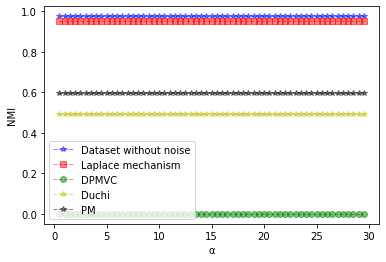

In [348]:


x_axis_data = np.arange(0.5,30.5,0.5)
y_axis_baseline = [m_nmi1]*60
y_axis_laplace = [m_nmi1n]*60
y_axis_Duchi = [m_nmi1n_duchi]*60
y_axis_PM = [m_nmi1n_PM]*60
y_axis_CA = nmi
print(m_nmi1n)
        
#画图 
plt.plot(x_axis_data[0:59], y_axis_baseline[0:59] , 'b*--', alpha=0.5, linewidth=1, label='Dataset without noise')#'
plt.plot(x_axis_data[0:59], y_axis_laplace[0:59], 'rs--', alpha=0.5, linewidth=1, label='Laplace mechanism')
plt.plot(x_axis_data[0:59], y_axis_CA[0:59], 'go--', alpha=0.5, linewidth=1, label='DPMVC')
plt.plot(x_axis_data[0:59], y_axis_Duchi[0:59], 'y*--', alpha=0.5, linewidth=1, label='Duchi')
plt.plot(x_axis_data[0:59], y_axis_PM[0:59], 'k*--', alpha=0.5, linewidth=1, label='PM')
plt.legend()  #显示上面的label
plt.xlabel('α')
plt.ylabel('NMI')#accuracy
 
#plt.ylim(-1,1)#仅设置y轴坐标范围
plt.show()
